In [ ]:
# 

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import models, datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [4]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images for pre-trained model input
    transforms.ToTensor(),
    #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Standard normalization for pre-trained models
])

In [5]:
dataset_path = r'C:\Users\priya\DEEP\Exp 04\data\chip_data\dataset'
train_dataset = datasets.ImageFolder(root=f"{dataset_path}/train", transform=transform)
test_dataset = datasets.ImageFolder(root=f"{dataset_path}/test", transform=transform)


In [6]:
# Display some input images
def show_sample_images(dataset, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(5, 5))
    for i in range(num_images):
        image, label = dataset[i]
        image = image.permute(1, 2, 0)  # Convert tensor format (C, H, W) to (H, W, C)
        axes[i].imshow(image)
        axes[i].set_title(dataset.classes[label])
        axes[i].axis("off")
    plt.show()

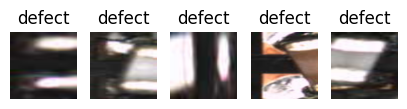

In [7]:
# Show sample images from the training dataset
show_sample_images(train_dataset)

In [8]:
# Get the total number of samples in the training dataset
print(f"Total number of training samples: {len(train_dataset)}")

# Get the shape of the first image in the dataset
first_image, label = train_dataset[0]
print(f"Shape of the first image: {first_image.shape}")

Total number of training samples: 172
Shape of the first image: torch.Size([3, 224, 224])


In [9]:
# Create DataLoader for batch processing
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [11]:
model = models.vgg19(pretrained=True)

In [13]:
# Load a pre-trained VGG19 model
num_classes = len(train_dataset.classes)
model.classifier[6] = nn.Linear(in_features=4096, out_features=num_classes)

In [14]:
# Freeze all convolutional (feature extraction) layers
for param in model.features.parameters():
    param.requires_grad = False

In [15]:
# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [17]:
from torchsummary import summary
summary(model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [18]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier[6].parameters(), lr=0.001)

Epoch [1/10], Train Loss: 0.1590, Validation Loss: 0.1987
Epoch [2/10], Train Loss: 0.1267, Validation Loss: 0.1930
Epoch [3/10], Train Loss: 0.1373, Validation Loss: 0.1960
Epoch [4/10], Train Loss: 0.1257, Validation Loss: 0.1970
Epoch [5/10], Train Loss: 0.1236, Validation Loss: 0.1913
Epoch [6/10], Train Loss: 0.1140, Validation Loss: 0.1884
Epoch [7/10], Train Loss: 0.1112, Validation Loss: 0.1915
Epoch [8/10], Train Loss: 0.1275, Validation Loss: 0.2092
Epoch [9/10], Train Loss: 0.1318, Validation Loss: 0.1855
Epoch [10/10], Train Loss: 0.0955, Validation Loss: 0.1823
Name: CHANDRAPRIYADHARSHINI C
Register Number: 212223240019


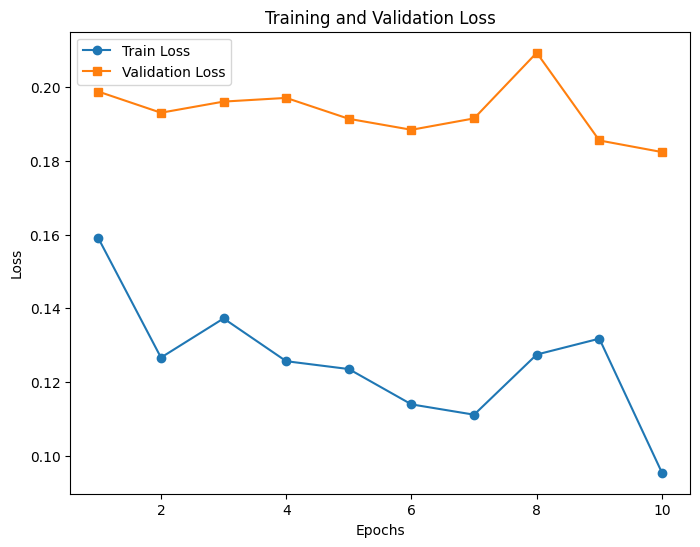

In [24]:
def train_model(model, train_loader, test_loader, num_epochs=10):
    train_losses = []
    val_losses = []
    model.train()

    for epoch in range(num_epochs):
        running_loss = 0.0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        train_losses.append(running_loss / len(train_loader))

        # Validation loss
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
        val_losses.append(val_loss / len(test_loader))
        model.train()

        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}")

    print("Name: CHANDRAPRIYADHARSHINI C")
    print("Register Number: 212223240019")

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', marker='o')
    plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', marker='s')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

# Train the model
train_model(model, train_loader, test_loader, num_epochs=10)

Test Accuracy: 0.9339
Name:  CHANDRAPRIYADHARSHINI C
Register Number: 212223240019


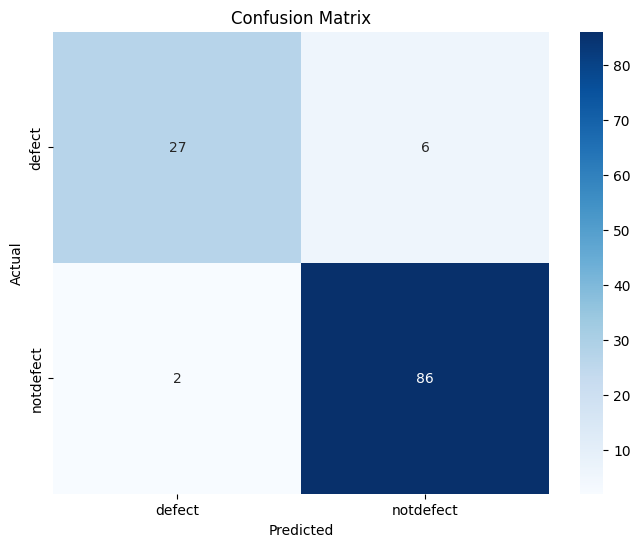

Classification Report:
              precision    recall  f1-score   support

      defect       0.93      0.82      0.87        33
   notdefect       0.93      0.98      0.96        88

    accuracy                           0.93       121
   macro avg       0.93      0.90      0.91       121
weighted avg       0.93      0.93      0.93       121



In [26]:
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = correct / total
    print(f'Test Accuracy: {accuracy:.4f}')

    cm = confusion_matrix(all_labels, all_preds)
    print("Name:  CHANDRAPRIYADHARSHINI C")
    print("Register Number: 212223240019")

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=train_dataset.classes,
                yticklabels=train_dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=train_dataset.classes))

# Evaluate
test_model(model, test_loader)

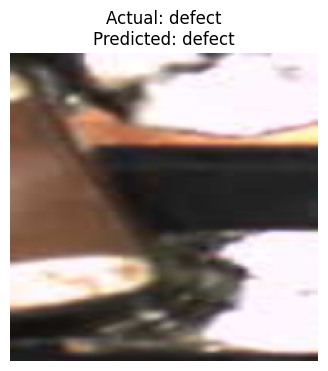

Actual: defect, Predicted: defect


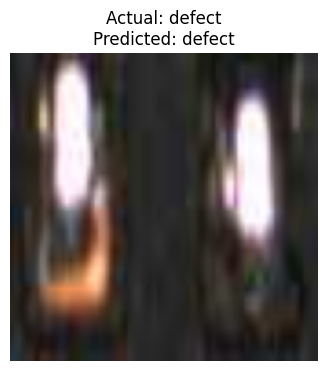

Actual: defect, Predicted: defect


In [27]:
def predict_image(model, image_index, dataset):
    model.eval()
    image, label = dataset[image_index]
    with torch.no_grad():
        image_tensor = image.unsqueeze(0).to(device)
        output = model(image_tensor)
        _, predicted = torch.max(output, 1)

    class_names = dataset.classes
    image_to_display = transforms.ToPILImage()(image)
    plt.figure(figsize=(4, 4))
    plt.imshow(image_to_display)
    plt.title(f'Actual: {class_names[label]}\nPredicted: {class_names[predicted.item()]}')
    plt.axis("off")
    plt.show()

    print(f'Actual: {class_names[label]}, Predicted: {class_names[predicted.item()]}')

# Example predictions
predict_image(model, image_index=10, dataset=test_dataset)
predict_image(model, image_index=25, dataset=test_dataset)